In [2]:
import numpy as np
from sklearn import linear_model
import pandas as pd
import yaml
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [16]:
ROOT_DIR = os.getcwd() + '/../'
try:
    with open (ROOT_DIR + '/configuration.yml', 'r') as file:
        config = yaml.safe_load(file)
except Exception as e:
    print('Error reading the config file')
    
DATA_DIR = ROOT_DIR + config['data']['final'] + '/' + 'all_merged.csv'
data = pd.read_csv(DATA_DIR)
cities = pd.read_csv(ROOT_DIR + config['cities'])

### Cities information, eg. to loop over city names:

* **ALE:**	Alert, Canada
* **ABZ:**	Annaberg-Buchholz, Germany
* **ASP:**	Aspvreten, Sweden
* **BOT:**	Botsalano, South Africa
* **BSL:**	Bösel (Südoldenburg), Germany
* **EGB:**	Egbert, Canada
* **HEL:**	Helsinki, Finland
* **HPB:**	Hohenpeissenberg, Germany
* **HYY:**	Hyytiälä, Finland
* **KCE:**	Kosetice, Czech Republic
* **KPZ:**	K-Puszta, Hungary
* **MHD:**	Mace Head, Ireland
* **MAR:**	Marikana, South Africa
* **MLP:**	Melpitz, Germany
* **NAN:**	Nanjing, China
* **NEU:**	Neuglobsow, Germany
* **SAO:**	São Paulo, Brazil
* **SCH:**	Schauinsland, Germany
* **SGP:**	Southern Great Plains, Oklahoma, US
* **VIE:**	Vielsalm, Belgium
* **VAR:**	Värriö, Finland
* **WAL:**	Waldhof, Germany

In [28]:
def args_for_lm(data):
    y = np.log(data['concentration'])
    t = data['t']
    lcon = np.log(data['co'])
    X = pd.DataFrame({'lcon' : lcon, 't' : t})
    
    return X, y

def lin_model(X,y):
    lm = linear_model.LinearRegression()
    fit = lm.fit(X,y)
    pred = lm.predict(X)
    
    print('intercept')
    print(lm.intercept_)
    print('Coef:')
    print(lm.coef_)
    
    return lm, fit, pred

def draw_scatterplot_mpl(y, pred, name, axn, x_axis_identical):
    slope, intercept = np.polyfit(y, pred, 1)
    axn.scatter(y, pred, alpha = 0.10)
    axn.plot(y, slope * y + intercept, color='blue', linewidth=0.5)
    
    axn.set(xlabel = 'observed', ylabel = 'predicted')
    axn.set_title(name)
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    
    textstr = 'R^2 = ' + str(round(r2_score(y,pred), 3))

    # place a text box in upper left in axes coords
    axn.text(0.05, 0.95, textstr, transform=axn.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    
    if x_axis_identical:     
        custom_xlim = (0, 10)
        custom_ylim = (3, 11)
        plt.setp(axn, xlim=custom_xlim, ylim=custom_ylim)
    plt.rcParams.update({'font.size': 22})
    

    
    
def draw_scatterplot_sns(y, pred, name):
    d = pd.DataFrame({'actual' : y, 'pred' : pred})
    slope, intercept = np.polyfit(y, pred, 1)
    sns.lineplot(y, slope * y + intercept, color = 'blue', linewidth = 0.5)
    ax = sns.scatterplot(x = "actual", y = "pred", data = d, alpha = 0.30)
    ax.set_title(name)


### Plotting actual vs. predicted 

intercept
22.351657815492334
Coef:
[2.13476933 0.06165048]
intercept
30.592633121533552
Coef:
[1.60750743 0.00603729]
intercept
23.818848694766622
Coef:
[1.64882023 0.03148008]
intercept
13.220281860994213
Coef:
[1.42313585 0.05459249]


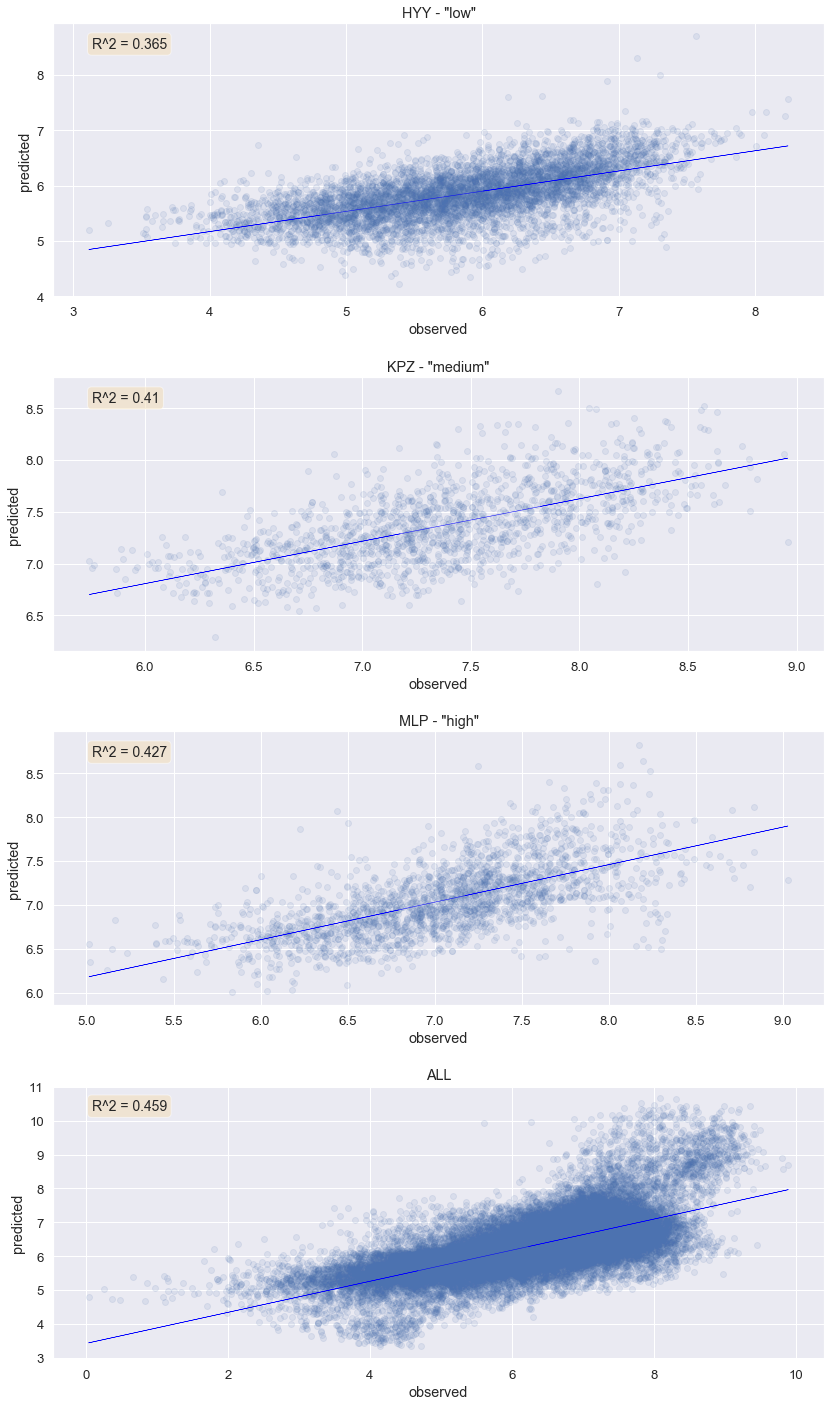

In [29]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(12, 20)


# actual vs. predicted in Hyytiälä, Finland, "low" pollution

data_ss = data[data['city'] == 'HYY']
X, y = args_for_lm(data_ss)
lm, fit, pred = lin_model(X,y)
draw_scatterplot_mpl(y,pred,'HYY - "low"', ax1, False)

# actual vs. predicted in K-Puszta, Hungary, "medium" pollution

data_ss = data[data['city'] == 'KPZ']
X, y = args_for_lm(data_ss)
lm, fit, pred = lin_model(X,y)
draw_scatterplot_mpl(y,pred,'KPZ - "medium"', ax2, False)

# actual vs. predicted in Melpitz, Germany, "high" pollution

data_ss = data[data['city'] == 'MLP']
X, y = args_for_lm(data_ss)
lm, fit, pred = lin_model(X,y)
draw_scatterplot_mpl(y,pred,'MLP - "high"', ax3, False)

# actual vs. predicted all locations

X, y = args_for_lm(data)
lm, fit, pred = lin_model(X,y)
draw_scatterplot_mpl(y,pred,'ALL', ax4, False)


fig.tight_layout()


### Same as above but with fixed x and y ranges

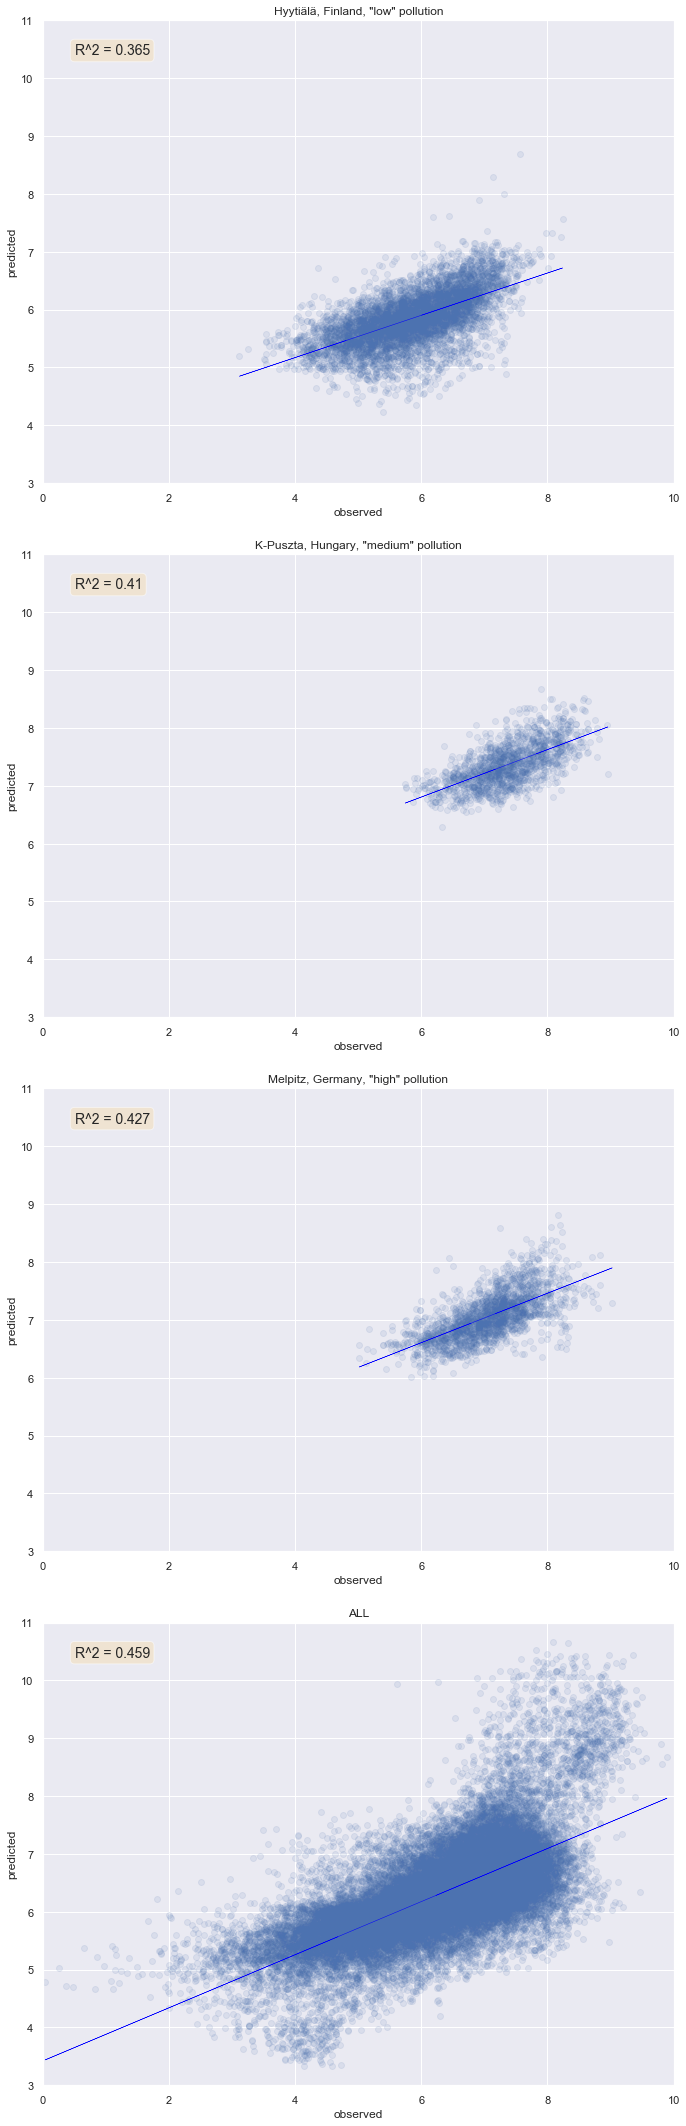

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_size_inches(10, 30)


# actual vs. predicted in Hyytiälä, Finland, "low" pollution

data_ss = data[data['city'] == 'HYY']
X, y = args_for_lm(data_ss)
lm, fit, pred = lin_model(X,y)
draw_scatterplot_mpl(y,pred,'Hyytiälä, Finland, "low" pollution', ax1, True)

# actual vs. predicted in K-Puszta, Hungary, "medium" pollution

data_ss = data[data['city'] == 'KPZ']
X, y = args_for_lm(data_ss)
lm, fit, pred = lin_model(X,y)
draw_scatterplot_mpl(y,pred,'K-Puszta, Hungary, "medium" pollution', ax2, True)


# actual vs. predicted in Melpitz, Germany, "high" pollution

data_ss = data[data['city'] == 'MLP']
X, y = args_for_lm(data_ss)
lm, fit, pred = lin_model(X,y)
draw_scatterplot_mpl(y,pred,'Melpitz, Germany, "high" pollution', ax3, True)

# actual vs. predicted all locations

X, y = args_for_lm(data)
lm, fit, pred = lin_model(X,y)
draw_scatterplot_mpl(y,pred,'ALL', ax4, True)


fig.tight_layout()

### Observed vs predicted with location colors

Text(0.5, 1.0, 'ALL')

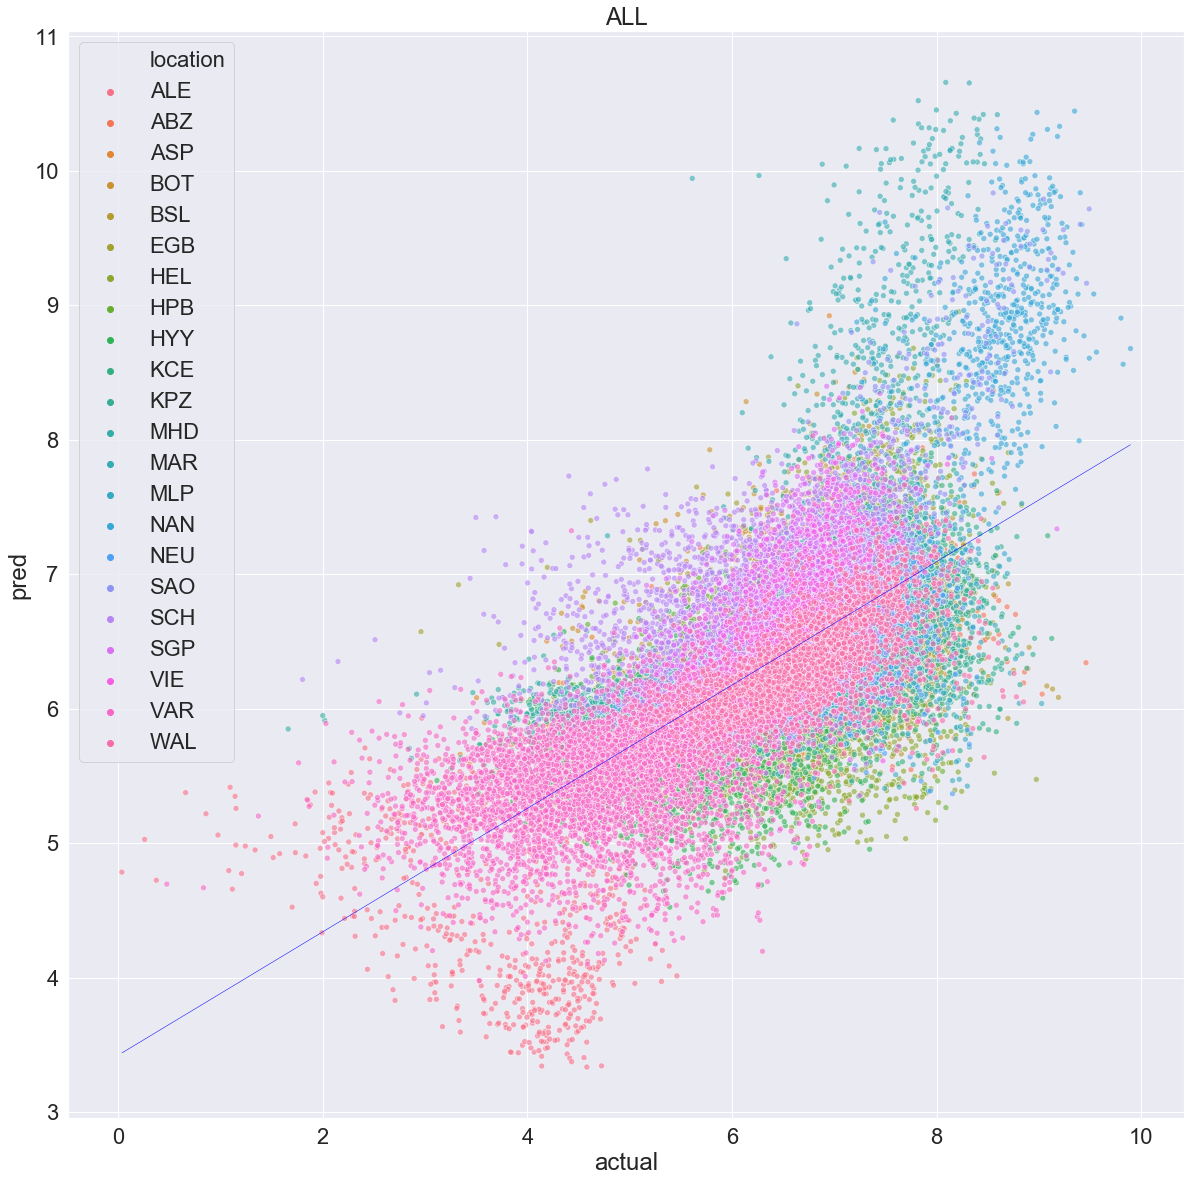

In [18]:
y = np.log(data['concentration'])
t = data['t']
lcon = np.log(data['co'])
locations = data['city']
X = pd.DataFrame({'lcon' : lcon, 't' : t})

lm, fit, pred = lin_model(X,y)

d = pd.DataFrame({'actual' : y, 'pred' : pred, 'location' : locations})
slope, intercept = np.polyfit(y, pred, 1)

sns.set(font_scale=2)
plt.figure(figsize=(20, 20))
sns.lineplot(y, slope * y + intercept, color = 'blue', linewidth = 0.5)
ax = sns.scatterplot(x = "actual", y = "pred", hue = 'location', data = d, alpha = 0.60)
ax.set_title('ALL')



0.45879615252249606


NameError: name 'model' is not defined

In [22]:
def draw_scatterplot_sns(d, name, axs, i):
    slope, intercept = np.polyfit(y, pred, 1)
    sns.lineplot(y, slope * y + intercept, color = 'blue', linewidth = 0.5, ax = axs[i])
    sns.scatterplot(x = "actual", y = "pred", data = d, hue = 'location', style = 'location', alpha = 0.30, ax = axs[i]).set_title(name + ' vs others')

    

def draw_scatterplot_sns2(d, name, axs, i):
    slope, intercept = np.polyfit(y, pred, 1)
    sns.lineplot(y, slope * y + intercept, color = 'blue', linewidth = 0.5, ax = axs[i])
    d2 = d[d['location'] == 'OTHER']
    sns.scatterplot(x = "actual", y = "pred", data = d2, alpha = 0.30, ax = axs[i]).set_title(name + ' vs others')
    d3 = d[d['location'] != 'OTHER']
    sns.scatterplot(x = "actual", y = "pred", data = d3, alpha = 0.6, ax = axs[i]).set_title(name + ' vs others')


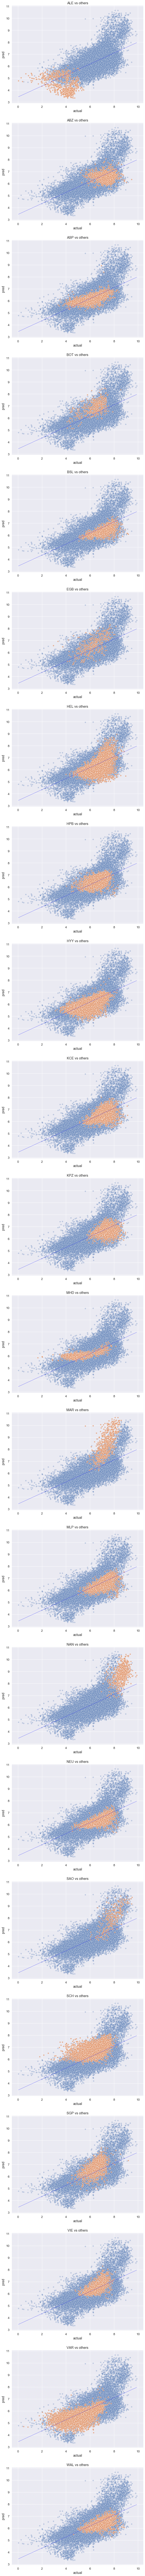

In [25]:
#data_ss = data[(data['city'] == 'KPZ') | (data['city'] == 'HYY')]
data_ss = data
cities = data_ss['city'].unique()

n = len(cities)


fig, axs = plt.subplots(n)
fig.set_size_inches(10, 200)
sns.set(font_scale=1.2)

for i, loc in enumerate(cities):
    loc_removed = np.delete(cities, np.where(cities == loc), axis=0)
    locations = data_ss['city'].replace(loc_removed, 'OTHER')
    
    X, y = args_for_lm(data_ss)
    lm, fit, pred = lin_model(X,y)
    
    d = pd.DataFrame({'actual' : y, 'pred' : pred, 'location' : locations})
    
    # draw only fraction of the points
    #d = d.sample(frac=0.8, replace=True, random_state=1)
    
    draw_scatterplot_sns2(d, loc, axs, i)

    